# Assignment 5

Linda Koine, Jens Weidmann, Markus Wiktorin

## Task 1

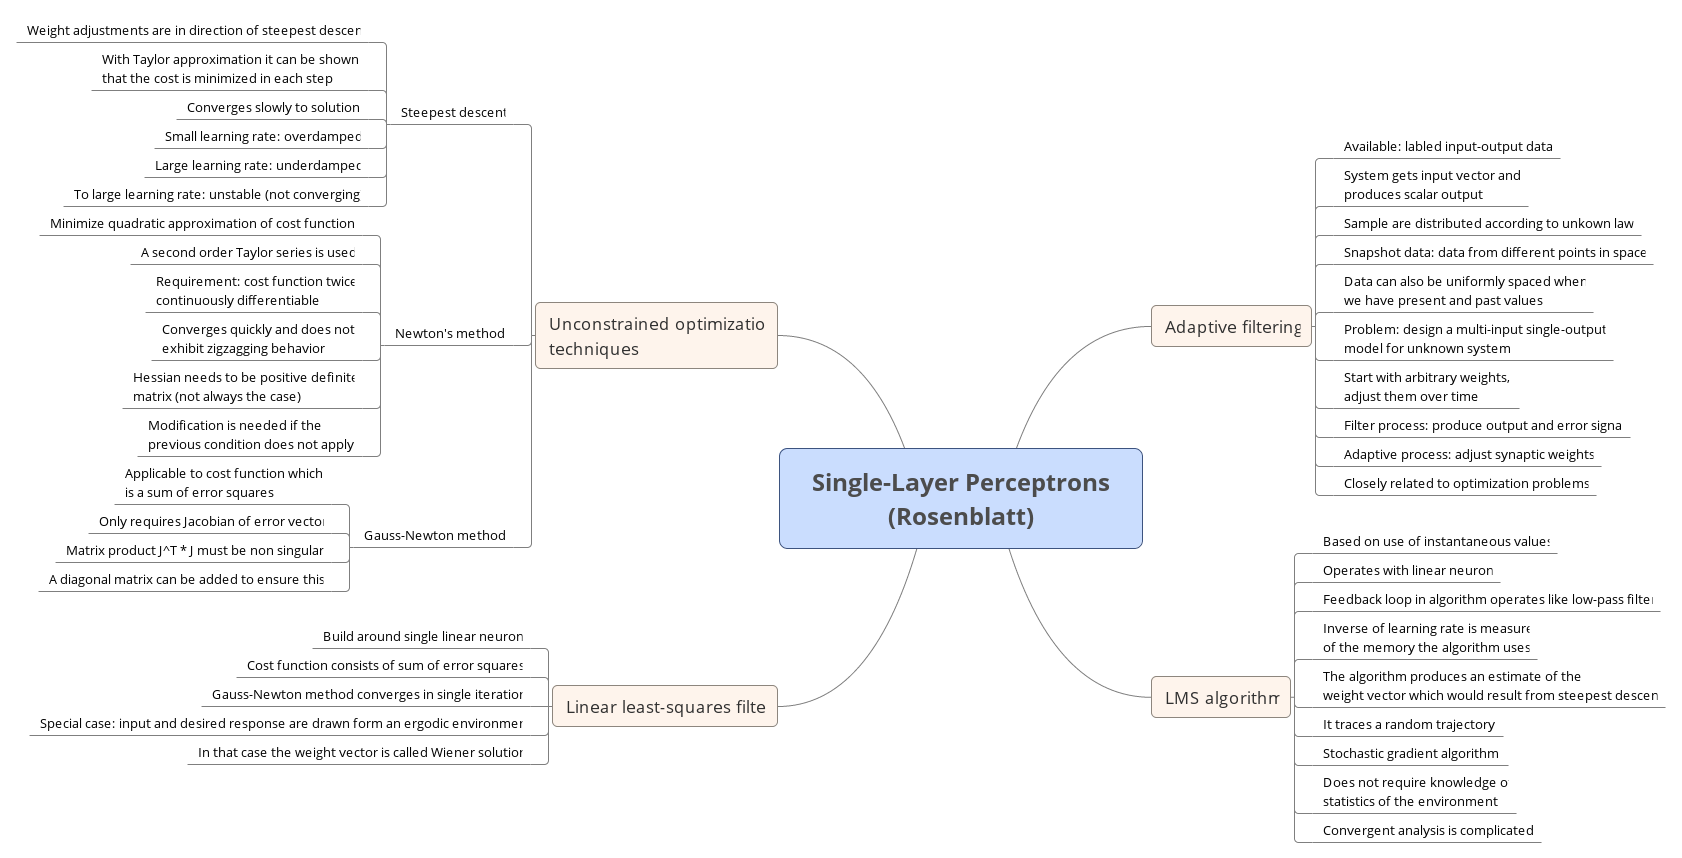

In [60]:
from IPython.display import Image
Image("Single-Layer_Perceptrons.png")

## Task 2 (Haykin 3.1)

In [61]:
print("LINDA")

LINDA


## Task 3 (Haykin 3.2)
### a

In [34]:
import sympy as sp
from scipy.optimize import minimize
from sympy.utilities.lambdify import lambdify
sp.init_printing()

In [58]:
w1 = sp.Symbol("w_1")
w2 = sp.Symbol("w_2")
w = sp.Matrix([[w1], [w2]])
sigma = sp.Symbol("sigma")

r = sp.Matrix([[0.8182], [0.354]])
R = sp.Matrix([[1, 0.8182], [0.8182, 1]])

a = r.transpose() * w
b = w.transpose() * R * w

#cost_func = 0.5 * sigma - a[0] + 0.5 * b[0]
cost_func = - a[0] + 0.5 * b[0]
lambdified = lambdify((w1, w2), cost_func)

def minimizable_function(params):
    w1, w2 = params
    return lambdified(w1, w2)

cost_func

In [56]:
solution = minimize(minimizable_function, [0, 0])
solution

      fun: -0.48524726287868303
 hess_inv: array([[ 2.93450335, -2.42312918],
       [-2.42312918,  2.99531171]])
      jac: array([  3.01748514e-06,   1.37835741e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([ 1.5990351 , -0.95432915])

In [59]:
w = solution.x
print("w* = ")
w

w* = 


array([ 1.5990351 , -0.95432915])

In the previos code we use scipy to minimize the function. The constant $\sigma^2$ does not matter for the minimization, since it could be chose arbitrarily negative.

### b